<a href="https://colab.research.google.com/github/furkanonat/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Furkan_Onat_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# **1) Write a function**
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):




`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  
  numerator = true_positive_rate * prob_drunk_prior
  denominator= (numerator) + (false_positive_rate * (1 - prob_drunk_prior))

  prob_drunk_given_positive =numerator / denominator
  return (prob_drunk_given_positive)

In [3]:
# after one positive breathalyzer test, the probability of a person being drunk

prob_drunk_given_positive(0.001, 0.08, 1)


0.012357884330202669

In [4]:
# after two positive breathalyzer test, the probability of a person being drunk

prob_drunk_given_positive(0.012357884330202669, 0.08, 1)

0.13525210993291495

In [5]:
# after three positive breathalyzer test, the probability of a person being drunk

prob_drunk_given_positive(0.13525210993291495, 0.08, 1)

0.6615996951348605

In [6]:
# after fourth positive breathalyzer test, the probability of a person being drunk over the legal limits is over 95%.

prob_drunk_given_positive(0.6615996951348605, 0.08, 1)

0.9606895076105054

# **2.) Explore scipy.stats.bayes_mvs**

In [0]:
from scipy import stats
help(stats.bayes_mvs)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names= column_headers)

df = df.replace({'y': 1, 'n': 0, '?': np.nan})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [11]:
dem = df[df['party']== 'democrat']
dem= dem.dropna()

dem.budget.head()


5     1.0
19    1.0
23    1.0
25    1.0
26    1.0
Name: budget, dtype: float64

In [0]:
# Frequentist Confidence Interval

def confidence_interval(data, confidence=0.95):
  sample=np.array(data)
  s=np.std(sample, ddof=1)
  n=len(sample)
  standard_error=s/np.sqrt(n)
  t=stats.t.ppf((1+confidence)/2, n-1)
  margin_of_error=t*standard_error
  x_bar=np.mean(sample)
  lower_bound=x_bar-margin_of_error
  upper_bound=x_bar+margin_of_error
  return (lower_bound, x_bar,upper_bound)



In [15]:
confidence_interval(dem['budget'],confidence=.95)

(0.791966749899413, 0.8548387096774194, 0.9177106694554258)

In [16]:
# Bayesian Confidence Interval

mean_budget, var, std = stats.bayes_mvs(dem['budget'], alpha=.95)
mean_budget

Mean(statistic=0.8548387096774194, minmax=(0.791966749899413, 0.9177106694554258))

0.8548387096774194
plus or minus 0.06287195977800641
0.8548387096774194
plus or minus 0.06287195977800641


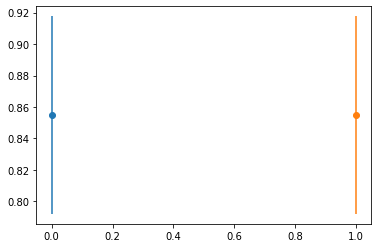

In [18]:
# Visualisation

lower1, mean1, upper1 = confidence_interval(dem['budget'])

moe1 = mean1 - lower1
print(mean1)
print('plus or minus', moe1)


mean2 = mean_budget.statistic
lower2= mean_budget.minmax[0]
upper2= mean_budget.minmax[1],
moe2 = mean2 - lower2

print(mean2)
print('plus or minus', moe2)

plt.errorbar(0, mean1, yerr=moe1, fmt='o')
plt.errorbar(1, mean2, yerr=moe2, fmt='o')

plt.show()

### **3) In your own words, summarize the difference between Bayesian and Frequentist statistics**

- Frequentist statisticians deal with experiments and samples. They need trials and results. They don't hold 'prior beliefs.' That's why frequentists do not say "the probability of a sample mean between two values are 95%" for a 95% confidence interval.  Instead, they say " the mean of a sample is between those two values for 95% of the possible samples." 

- Bayesian Statisticans begin with 'prior belief.' This prior information for the distribution of data becomes their starting point and then they update their calculations in the light of new data. This new data becomes their new 'prior belief.' 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!